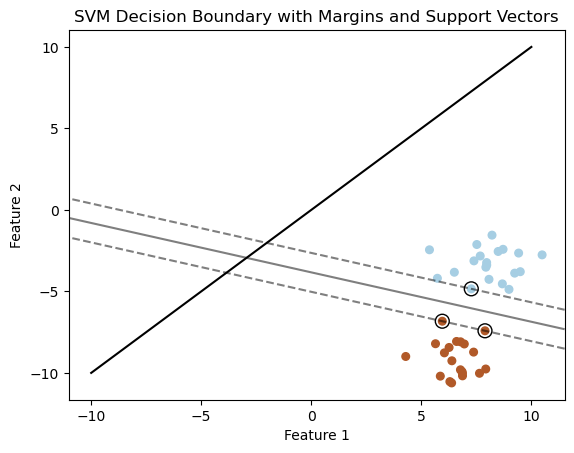

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Create a grid to plot in
xx, yy = np.meshgrid(np.linspace(-10, 10, 500),
                     np.linspace(-10, 10, 500))

# Plot the decision boundary and margins
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.plot([xx.min(), xx.max()], [yy.min(), yy.max()], 'k-')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot decision boundary and margins
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Draw decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Margins and Support Vectors')
plt.savefig('Ch9SVMDecisionBoundary1.png')
plt.show()
